In [1]:
%matplotlib notebook

 Observations and Insights

In [2]:
 # Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

# Study data files
mouse_metadata_path = "/Users/matthewvicario/MatPlotLib/MatPlotLib-Challenge/meta_data.csv"
study_results_path = "/Users/matthewvicario/MatPlotLib/MatPlotLib-Challenge/study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Display the data table for preview
combined_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice
mice_count = combined_mouse_data["Mouse ID"].nunique()
mice_count

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_data = pd.DataFrame(combined_mouse_data.drop_duplicates(["Mouse ID", "Timepoint"]))
new_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
mice_count

249

 Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
new_mouse_sorted = new_mouse_data.sort_values(["Tumor Volume (mm3)"], ascending=True)

volume_mean = new_mouse_sorted.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
volume_median = new_mouse_sorted.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
volume_std = new_mouse_sorted.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
volume_var = new_mouse_sorted.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
volume_sem = new_mouse_sorted.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

regimen_stats_df = pd.DataFrame({"Volume Mean" : volume_mean,
                                   "Volume Median" : volume_median,
                                   "Volume Std Dev": volume_std,
                                   "Volume Variance": volume_var,
                                   "Volume SEM": volume_sem})
regimen_stats_df


,Volume Mean,Volume Median,Volume Std Dev,Volume Variance,Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


Bar and Pie Charts

<IPython.core.display.Javascript object>


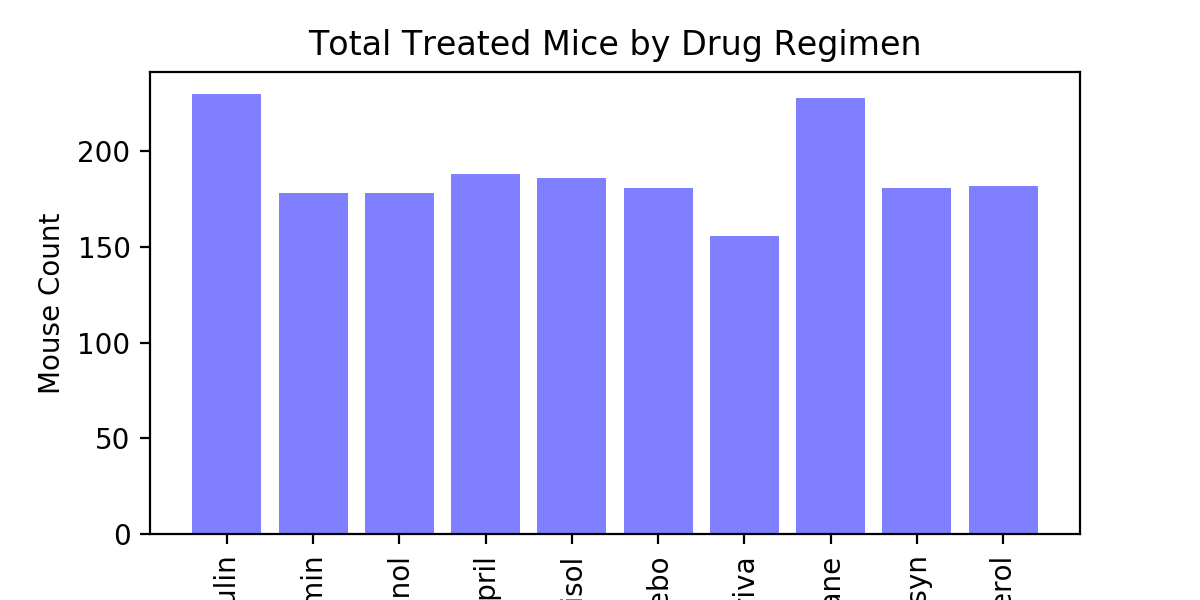

Text(0, 0.5, 'Mouse Count')

In [38]:
# Generate a bar plot showing the total number of mice for each treatment throughout 
# the course of the study using pandas & pyplot 

regimens = regimen_stats_df.index.tolist()
#regimens
mouse_count = (new_mouse_sorted.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].count()).tolist()
#mouse_count
x_axis = np.arange(len(mouse_count))
x_axis = regimens

plt.figure(figsize=(6,3))
plt.bar(x_axis, mouse_count, color='b', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation = "vertical")

plt.title("Total Treated Mice by Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Mouse Count")

<IPython.core.display.Javascript object>


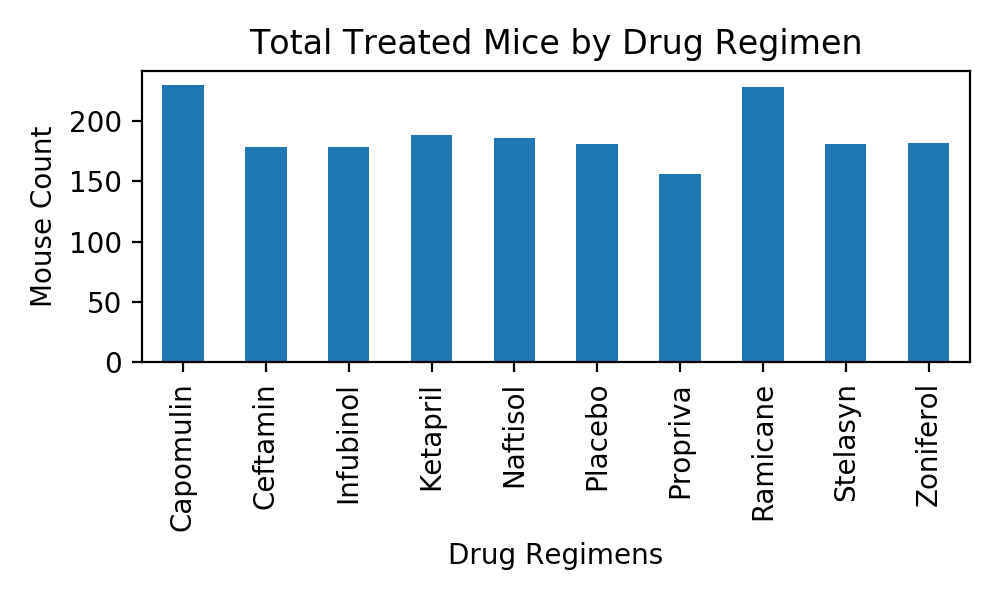

In [36]:
pandas_mouse_count = new_mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_count_df = pd.DataFrame(plt_mouse_count)

regimen_count_df.plot(kind='bar',figsize=(5,3), legend=False, rot=90)

plt.title("Total Treated Mice by Drug Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Mouse Count")
plt.tight_layout()
plt.show()

In [23]:
# Generate a pie plot showing the distribution of female versus male mice 
# using pandas & pyplot
mouse_gender = mouse_metadata.groupby(["Sex"]).count()
#mouse_gender
labels = ["mouse_metadata['Sex'].unique()"]
gender = list(mouse_gender.index)
#gender
sizes = [mouse_gender["Mouse ID"]]
#sizes
colors = ["lightpink", "lightblue"]

plt.pie(sizes, labels = labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 180)

plt.title('Gender Comparison')
plt.ylabel('Gender')

plt.show()

/Users/matthewvicario/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


ValueError: 'label' must be of length 'x'

In [18]:
pandaspie = mouse_gender["Mouse ID"].plot.pie(y='sizes', figsize=(5, 5), autopct="%1.1f%%",startangle=180)
plt.title('Male vs Female Mouse Population')
plt.title('Gender Comparison')
plt.ylabel('Gender')

plt.show()

Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest